Spreading of a Quantum Wave Packet in a Square Well
==========================================

Jim Mahoney | March 2018

### Theory

The time dependent Schrodinger equation for the classic one dimensional infinite square well of width $L$ .

$$ - \frac{\hbar^2}{2m}  \frac{\partial^2}{\partial x^2} \Psi(x,t) = i \hbar \frac{\partial}{\partial t}\Psi(x,t) $$

with $ \Psi(x \le 0,t) = \Psi(x \ge L,t) = 0 $.

Its solution for $ 0 < x < L $ is

$$ \Psi(x, t) = \sum_{n=1}^{\infty} \, C_n \, \psi_n(x) \, e^{- i \, \omega_n t} $$

where 

\begin{align}
  \psi_n(x) =& \, \sqrt\frac{2}{L} \sin ( k_n x ) \quad \text{are the normalized stationary states,}\\
   k_n =& \, \frac{n \pi }{L} = n k_1 \quad \text{is the wave number of the n'th state,}\\
   \lambda_n =& \, \frac{2 \pi}{k_n} = \frac{2\,L}{n} \quad \text{is the n'th wave length,} \\
   p_n =& \, \hbar \, k_n \quad \text{is the n'th momentum, and} \\
   E_n =& \, \hbar \, \omega_n = \frac{{p_n}^2}{2 m} = n^2 \hbar \omega_1 \quad \text{is the n'th energy.}
\end{align}

The stationary states have the property that 

$$ \int_0^L \, \psi_a(x) \, \psi_b(x) \, dx = \, \delta_{ab} \, = 
\begin{cases} 1 & \text{if} \, a = b \\
              0 & \text{if} \, a \ne b
\end{cases}
$$

In other words, they form an orthonormal basis.

This gives us a way to find the coefficients $C_n$ for a given initial condition $\Psi(x, t=0)$ .

\begin{align}
  \Psi(x, t=0) = & \sum_{b=1}^{\infty} \, C_b \, \psi_b(x) \\
  \int_0^L \, \psi_a(x) \, \Psi(x,0) \, dx = & \int_0^L \, \psi_a(x) \, \sum_{b=1}^{\infty} \, C_b \, \psi_b(x) \, dx \\
  \int_0^L \, \psi_a(x) \, \Psi(x,0) \, dx = & \sum_{b=1}^{\infty} C_b \, \int_0^L \, \psi_a(x) \, \psi_b(x) \, dx \\
  \int_0^L \, \psi_a(x) \, \Psi(x,0) \, dx = & \sum_{b=1}^{\infty} \, C_b \, \delta_{ab} \\
  \int_0^L \, \psi_a(x) \, \Psi(x,0) \, dx = & \, C_a \\
\end{align}

(By the way, in bra-ket notation this would be just $ \left< a \, \big| \, \Psi \right> = C_a $ .)

We'll do these calculations numerically. But first we'll change variables to dimensionless units to make the numbers nicer.
by defining a dimesionless (length, time) as ( $s = k_1 x $ , $\tau = \omega_1 t $) , using the ground state wave number and angular frequency (i.e. $n=1$ in the equations above).

With these variables the equations become

\begin{align}
 \psi_n(s) = & \, \sqrt{\frac{2}{\pi}} \, \sin ( n \, s ) \\
 \Psi(s, \tau) = & \sum_{n=1}^{\infty} \, C_n \, \psi_n(s) \, e^{- i \, n^2 \tau} \\
 C_n = & \int_0^\pi \, \psi_n(s) \, \Psi(s, 0) \, ds \\
 & \text{for} \, 0 < s < \pi
\end{align}


In [1]:
# Install the python packages we'll use later.
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import numpy as np
import sys
% matplotlib inline

from numpy import linspace, pi, sin, sqrt, dot, conj, \
                  exp, round, real, imag, absolute, angle, matrix, zeros
from matplotlib import animation
from IPython.display import HTML

# What version of python is this?
print(sys.version)

3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [2]:
## Definitions ##

s_min = 0
s_max = pi
s_points = 1024

ds = (s_max - s_min) / (s_points - 1)  # -1 from fencepost grid correction
s = linspace(s_min, s_max, s_points)

def psi(n):
    """ stationary states"""
    return sqrt(2/pi) * sin(n * s)

def bracket(phi1, phi2):
    """ quantum inner product of two complex wavefunctions """
    # i.e. integral { conj(phi1(s) * phi2(s) ds }"""
    return dot(conj(phi1), phi2) * ds

def Psi(C, tau):
    """ time dependent wavefunction at time tau from given coefficients C"""
    result = zeros(s_points) * (1 + 0j)
    for i in range(len(C)):
        n = i + 1
        result += C[i] * psi(n) * exp(-(1j) * n**2 * tau)
    return result

def gaussian(mean, sigma):
    """ bell curve with given mean and standard deviation"""
    return 1.0/sqrt(2*pi*sigma**2) * exp(- ((s-mean)/sigma)**2 / 2)


### stationary states

In [9]:
# Confirm that the stationary states psi_n form an orthonormal basis.
(nmax, sigfigs) = (10, 5)  # (how many stationary states, decimal digits to roundoff)
print(matrix(
    [[ round( bracket(psi(column), psi(row)), sigfigs) 
       for column in range(1, nmax)] for row in range(1, nmax)] ))

[[ 1. -0.  0. -0. -0.  0.  0. -0.  0.]
 [-0.  1.  0. -0. -0. -0. -0. -0. -0.]
 [ 0.  0.  1. -0. -0. -0.  0. -0. -0.]
 [-0. -0. -0.  1.  0.  0. -0. -0.  0.]
 [-0. -0. -0.  0.  1. -0. -0.  0. -0.]
 [ 0. -0. -0.  0. -0.  1. -0.  0. -0.]
 [ 0. -0.  0. -0. -0. -0.  1. -0. -0.]
 [-0. -0. -0. -0.  0.  0. -0.  1.  0.]
 [ 0. -0. -0.  0. -0. -0. -0.  0.  1.]]


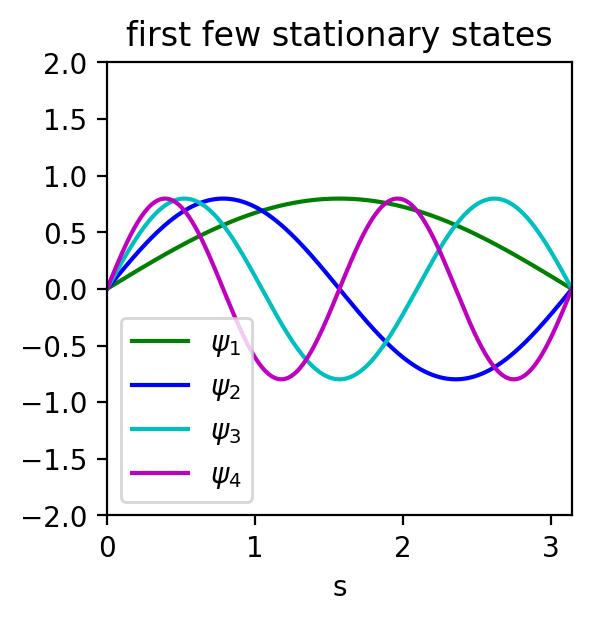

In [10]:
# Lets look at 'em.
plt.figure(dpi=200, figsize=(3, 3))
plt.title("first few stationary states")
plt.xlabel("s")
plt.xlim((0, pi))
plt.ylim((-2, 2))
for (n, color) in ((1,'g'), (2,'b'), (3, 'c'), (4, 'm')): # green, blue, cyan, magenta
    plt.plot(s, psi(n), color)
plt.legend(["$\psi_{}$".format(n) for n in (1,2,3, 4)])
plt.show()

### initial wavefunction - localized gaussian

In [3]:
# Choose the initial wavefunction at tau=0 to be at a somewhat specific place,
# i.e. a gaussian with a given position and somewhat narrow width
s_position = 1.0
s_width = 0.03
Psi_0 = sqrt(gaussian(s_position, s_width))

In [11]:
# Check its normalization.
bracket(Psi_0, Psi_0)

0.99999999999999989

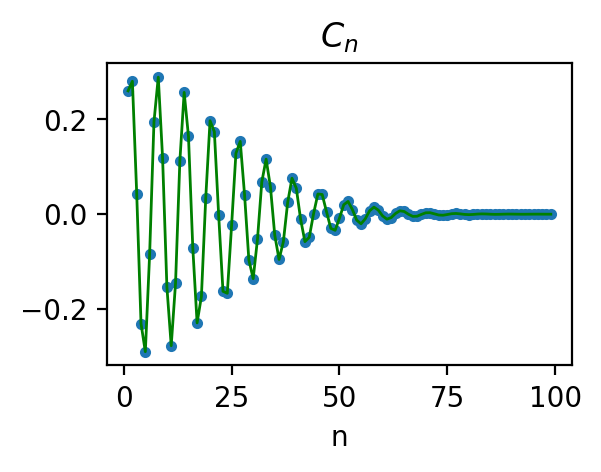

In [13]:
# Calculate its coefficients
nmax = 100
C = [ bracket(psi(n), Psi_0) for n in range(1,nmax)]

# ... and take a look at them.
plt.figure(dpi=200, figsize=(3, 2))
plt.title("$C_n$")
plt.xlabel("n")
#plt.xlim((0, pi))
#plt.ylim((-1, 4))
plt.plot(range(1,nmax), C, '.')
plt.plot(range(1,nmax), C, 'g', linewidth=1)
plt.show()

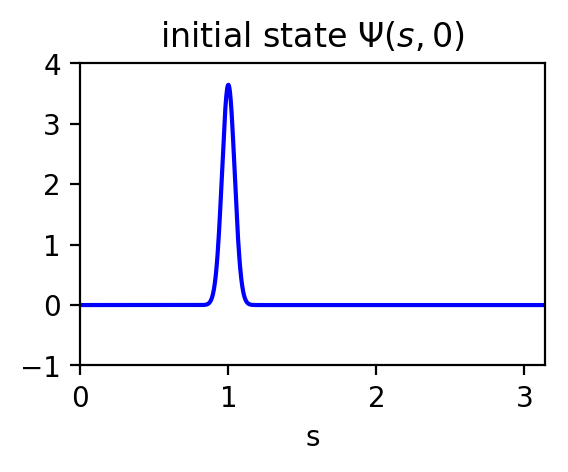

In [12]:
# Let's see it.
plt.figure(dpi=200, figsize=(3, 2))
plt.title("initial state $\Psi(s, 0)$")
plt.xlabel("s")
plt.xlim((0, pi))
plt.ylim((-1, 4))
plt.plot(s, Psi_0, 'b')
plt.show()

### time evolution

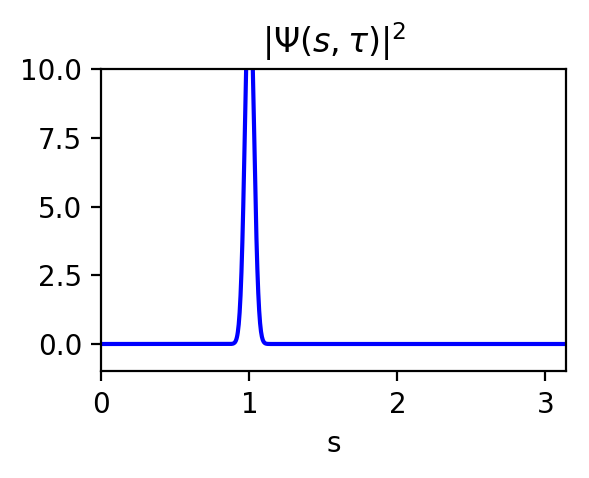

In [5]:
# The probability distribution is

tau = 0
p = Psi(C, tau)
prob = real( conj(p) * p )

fig = plt.figure(dpi=200, figsize=(3, 2))
axes = plt.axes()

line, = axes.plot(s, prob, 'b')

axes.set_title("$|\\Psi(s, \\tau)|^2$")
axes.set_xlabel("s")
axes.set_xlim((0, pi))
axes.set_ylim((-1, 10))

plt.show()

In [6]:
# probability time evolution

def init():
    line.set_data([], [])
    return (line,)

def animate(frame_i):
    tau = 0.0002 * frame_i
    p = Psi(C, tau)
    prob = real( conj(p) * p )
    line.set_data(s, prob)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=20, blit=True)

anim.save('probability.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
HTML("<video controls><source src='probability.mp4' type='video/mp4'></video>")

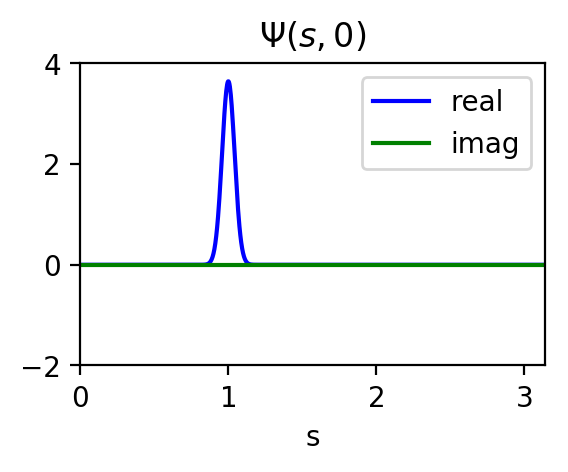

In [14]:
# Or we can look at the real and imaginary parts of the wavefunction.

# The wave function at time 0 reconstructed from the coefficients.
tau = 0
Psi_tau = Psi(C, tau)

fig = plt.figure(dpi=200, figsize=(3, 2))
axes = plt.axes()

line1, = axes.plot(s, real(Psi_tau), 'b', label="real")
line2, = axes.plot(s, imag(Psi_tau), 'g', label="imag")
title = axes.set_title("$\Psi(s, {})$".format(tau))

axes.set_xlabel("s")
axes.set_xlim((0, pi))
axes.set_ylim((-2, 4))
axes.legend()

plt.show()

In [15]:
# And here are how those change with time.

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    title.set_text("")
    return (line1, line2, title)

def animate(frame_i):
    tau = 0.0002 * frame_i
    Psi_tau = Psi(C, tau)
    line1.set_data(s, real(Psi_tau))
    line2.set_data(s, imag(Psi_tau))
    title.set_text("$\Psi(s, {:6.4f})$".format(tau))
    return (line1, line2, title)

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=400, interval=20, blit=True)
anim.save('realimag.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
HTML("<video controls><source src='realimag.mp4' type='video/mp4'></video>")

_Now_ we're having fun.